In [1]:
import pandas as pd
from tableone import TableOne
import matplotlib.pyplot as plt
import numpy as np

# Final Cohort

In [41]:
data = pd.read_csv('./data/final_cohort.csv')
data = data.iloc[:, 4:]
data.drop(columns="allergy_cum", inplace=True)
data.head()
# print(gusto.shape) # 1237*44

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,2.970,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,NaN,NaN,8.0,NaN,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


In [42]:
pd.set_option('display.max_columns', None)
data.loc[data['bf_m6'] == 99, 'bf_m6'] = np.nan
# data.loc[data['ethnicity'] == 4, 'ethnicity'] = np.nan
data.loc[data['bisq_q3_m12'] == -8888, 'bisq_q3_m12'] = np.nan
data.loc[data['bisq_totslphrs_m12'] == -8888, 'bisq_totslphrs_m12'] = np.nan
data.describe()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label
count,1151.000000,1151.000000,1141.000000,1047.000000,1135.000000,1137.000000,943.000000,945.000000,1131.000000,1101.000000,1099.000000,1136.000000,1150.000000,1151.000000,1055.00000,1053.000000,833.000000,817.000000,1071.000000,828.000000,1094.000000,1140.000000,1114.000000,1150.000000,1143.000000,1113.000000,1100.000000,785.000000,779.000000,642.000000,641.000000,1094.000000,1120.000000,921.000000,925.000000,872.000000,586.000000,966.000000,489.000000
mean,1.529105,31.591086,0.776512,3.921681,0.455507,1.022867,0.039236,0.450794,0.017683,0.375114,0.331210,1.303697,0.511304,38.796299,34.28436,36.565052,34.452581,36.616891,7.272642,6.496377,0.173675,0.425439,0.027828,0.773043,3.109043,0.344115,0.077273,8.551837,11.949380,9.082814,11.883749,0.515539,0.435714,0.038002,0.065946,0.146789,0.564846,0.736025,0.478528
std,0.752257,4.736035,0.416765,1.083325,0.722224,0.969339,0.242834,0.799869,0.131856,0.484372,0.470863,0.460056,0.500090,1.474995,9.83906,8.941763,10.380639,9.825006,4.492610,4.828747,0.379003,0.494626,0.164553,0.908218,0.451020,0.475292,0.267145,1.885748,2.667674,1.449472,1.831601,0.499987,0.496072,0.191305,0.248322,0.354099,0.496201,0.441014,0.500050
min,1.000000,18.930000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.860000,20.00000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.305000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.140000,26.00000,30.000000,26.000000,29.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.855000,0.000000,0.000000,7.666667,10.416667,8.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,31.520000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,39.000000,33.00000,36.000000,33.000000,36.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.120000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,34.880000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,39.710000,41.00000,43.000000,41.000000,43.000000,10.000000,9.000000,0.000000,1.000000,0.000000,1.000000,3.390000,1.000000,0.000000,10.000000,14.000000,10.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,46.890000,1.000000,5.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,41.430000,73.00000,68.000000,74.000000,73.000000,26.000000,28.000000,1.000000,1.000000,1.000000,7.000000,4.575000,1.000000,1.000000,13.000000,20.000000,13.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
data.drop(columns=["eczema_label", 'rhinitis_label', 'wheeze_label'], inplace=True)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
pd.set_option('display.max_rows', None)
columns = list(data.columns)
categorical = ['ethnicity', 'highest_edu12', 'household_income', 'pc_vig', 'pc_mvpa', 'pg_vig', 
'pg_mvpa', 'smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'delivery_mode', 'sex', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 
'antibiotics_labour', 'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
mytable = TableOne(data, columns=columns, categorical=categorical, dip_test=True, normal_test=True, tukey_test=True)
mytable
# print(mytable.tabulate(tablefmt="github"))

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


Missing      Overall
n                                                 1151
ethnicity, n (%)              1.0       0   716 (62.2)
                              2.0           269 (23.4)
                              3.0           158 (13.7)
                              4.0              8 (0.7)
delivery_age, mean (SD)                 0   31.6 (4.7)
highest_edu12, n (%)          0.0      10   255 (22.3)
                              1.0           886 (77.7)
household_income, n (%)       1.0     104     16 (1.5)
                              2.0            100 (9.6)
                              3.0           262 (25.0)
                              4.0           241 (23.0)
                              5.0           428 (40.9)
pc_vig, n (%)                 0.0      16   773 (68.1)
                              1.0           207 (18.2)
                              2.0           155 (13.7)
pc_mvpa, n (%)                0.0      14   388 (34.1)
                              1.0           468 (41.2)
                              2.0           148 (13.0)
                              3.0           133 (11.7)
pg_vig, n (%)                 0.0     208   916 (97.1)
                              1.0             17 (1.8)
                              2.0             10 (1.1)
pg_mvpa, n (%)                0.0     206   654 (69.2)
                              1.0           206 (21.8)
                              2.0             35 (3.7)
                              3.0             50 (5.3)
smoking_pg, n (%)             0.0      20  1111 (98.2)
                              1.0             20 (1.8)
passive_smoke_pc, n (%)       0.0      50   688 (62.5)
                              1.0           413 (37.5)
passive_smoke_pg, n (%)       0.0      52   735 (66.9)
                              1.0           364 (33.1)
delivery_mode, n (%)          1.0      15   791 (69.6)
                              2.0           345 (30.4)
sex, n (%)                    0.0       1   562 (48.9)
                              1.0           588 (51.1)
ga, mean (SD)                           0   38.8 (1.5)
stai_state_pw26, mean (SD)             96   34.3 (9.8)
stai_trait_pw26, mean (SD)             98   36.6 (8.9)
stai_state_m3, mean (SD)              318  34.5 (10.4)
stai_trait_m3, mean (SD)              334   36.6 (9.8)
epds_tot_pw26, mean (SD)               80    7.3 (4.5)
epds_tot_m3, mean (SD)                323    6.5 (4.8)
infection_m3, n (%)           0.0      57   904 (82.6)
                              1.0           190 (17.4)
alcohol_pc, n (%)             0.0      11   655 (57.5)
                              1.0           485 (42.5)
alcohol_pg, n (%)             0.0      37  1083 (97.2)
                              1.0             31 (2.8)
parity, mean (SD)                       1    0.8 (0.9)
weight_birth, mean (SD)                 8    3.1 (0.5)
antibiotics_labour, n (%)     0.0      38   730 (65.6)
                              1.0           383 (34.4)
antibiotics_m3, n (%)         0.0      51  1015 (92.3)
                              1.0             85 (7.7)
bisq_q3_m6, mean (SD)                 366    8.6 (1.9)
bisq_totslphrs_m6, mean (SD)          372   11.9 (2.7)
bisq_q3_m12, mean (SD)                509    9.1 (1.4)
bisq_totslphrs_m12, mean (SD)         510   11.9 (1.8)
bf_m6, n (%)                  0.0      57   530 (48.4)
                              1.0           564 (51.6)
maternal_allergy_pw11, n (%)  0.0      31   632 (56.4)
                              1.0           488 (43.6)
cat, n (%)                    0.0     230   886 (96.2)
                              1.0             35 (3.8)
dog, n (%)                    0.0     226   864 (93.4)
                              1.0             61 (6.6)
expressway, n (%)             0.0     279   744 (85.3)
                              1.0           128 (14.7)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: ga, stai_state_pw26, sta

In [13]:
pd.set_option('display.max_rows', None)
nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12"
nonnormal = nonnormal.split(", ")
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
mytable = TableOne(data, columns=columns, categorical=categorical, nonnormal=nonnormal, limit=limit)
mytable

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


Missing           Overall
n                                                           1151
ethnicity, n (%)                   1.0       0        716 (62.2)
                                   2.0                269 (23.4)
                                   3.0                158 (13.7)
                                   4.0                   8 (0.7)
delivery_age, mean (SD)                      0        31.6 (4.7)
highest_edu12, n (%)               0.0      10        255 (22.3)
                                   1.0                886 (77.7)
household_income, n (%)            1.0     104          16 (1.5)
                                   2.0                 100 (9.6)
                                   3.0                262 (25.0)
                                   4.0                241 (23.0)
                                   5.0                428 (40.9)
pc_vig, n (%)                      0.0      16        773 (68.1)
                                   1.0                207 (18.2)
                                   2.0                155 (13.7)
pc_mvpa, n (%)                     0.0      14        388 (34.1)
                                   1.0                468 (41.2)
                                   2.0                148 (13.0)
                                   3.0                133 (11.7)
pg_vig, n (%)                      0.0     208        916 (97.1)
                                   1.0                  17 (1.8)
                                   2.0                  10 (1.1)
pg_mvpa, n (%)                     0.0     206        654 (69.2)
                                   1.0                206 (21.8)
                                   2.0                  35 (3.7)
                                   3.0                  50 (5.3)
smoking_pg, n (%)                  0.0      20       1111 (98.2)
                                   1.0                  20 (1.8)
passive_smoke_pc, n (%)            0.0      50        688 (62.5)
                                   1.0                413 (37.5)
passive_smoke_pg, n (%)            0.0      52        735 (66.9)
                                   1.0                364 (33.1)
delivery_mode, n (%)               1.0      15        791 (69.6)
                                   2.0                345 (30.4)
sex, n (%)                         0.0       1        562 (48.9)
                                   1.0                588 (51.1)
ga, median [Q1,Q3]                           0  39.0 [38.1,39.7]
stai_state_pw26, median [Q1,Q3]             96  33.0 [26.0,41.0]
stai_trait_pw26, median [Q1,Q3]             98  36.0 [30.0,43.0]
stai_state_m3, median [Q1,Q3]              318  33.0 [26.0,41.0]
stai_trait_m3, median [Q1,Q3]              334  36.0 [29.0,43.0]
epds_tot_pw26, median [Q1,Q3]               80    7.0 [4.0,10.0]
epds_tot_m3, median [Q1,Q3]                323     6.0 [3.0,9.0]
infection_m3, n (%)                0.0      57        904 (82.6)
                                   1.0                190 (17.4)
alcohol_pc, n (%)                  0.0      11        655 (57.5)
                                   1.0                485 (42.5)
alcohol_pg, n (%)                  0.0      37       1083 (97.2)
                                   1.0                  31 (2.8)
parity, median [Q1,Q3]                       1     1.0 [0.0,1.0]
weight_birth, median [Q1,Q3]                 8     3.1 [2.9,3.4]
antibiotics_labour, n (%)          0.0      38        730 (65.6)
                                   1.0                383 (34.4)
antibiotics_m3, n (%)              0.0      51       1015 (92.3)
                                   1.0                  85 (7.7)
bisq_q3_m6, median [Q1,Q3]                 366    9.0 [7.7,10.0]
bisq_totslphrs_m6, median [Q1,Q3]          372  12.0 [10.4,14.0]
bisq_q3_m12, median [Q1,Q3]                509    9.0 [8.0,10.0]
bisq_totslphrs_m12, median [Q1,Q3]         510  12.0 [11.0,13.0]
bf_m6, n (%)                       1.0      57        564 (51.6)
         

In [22]:
# Save to Excel
fn1 = './tableone/paper/final_cohort.xlsx'
mytable.to_excel(fn1)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Excluded Patients

In [2]:
excluded = pd.read_csv('./data/excluded_patients.csv')
excluded = excluded.iloc[:, 4:]
excluded.drop(columns="allergy_cum", inplace=True)
excluded.head()
# print(gusto.shape) # 1237*44

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,...,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label
0,3.0,30.89,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,29.27,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,31.40,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [3]:
excluded.describe()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,...,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label
count,462.000000,385.000000,455.000000,416.000000,408.000000,408.000000,309.000000,309.000000,386.000000,399.000000,...,92.000000,92.000000,429.000000,454.000000,197.000000,198.000000,172.000000,0.0,0.0,0.0
mean,1.647186,30.240623,0.694505,3.685096,0.431373,0.980392,0.022654,0.278317,0.028497,0.408521,...,9.074275,11.774004,46.396270,0.396476,0.015228,0.080808,0.127907,NaN,NaN,NaN
std,0.808699,4.506760,0.461124,1.161374,0.715017,1.010805,0.204188,0.679153,0.166605,0.492178,...,1.356678,1.784430,49.218961,0.489705,0.122772,0.273231,0.334961,NaN,NaN,NaN
min,1.000000,19.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1.000000,27.070000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,1.000000,30.320000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,2.000000,33.540000,1.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,10.000000,12.687500,99.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
max,4.000000,43.040000,1.000000,5.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,...,12.000000,17.000000,99.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
excluded.loc[excluded['bf_m6'] == 99, 'bf_m6'] = np.nan
# data.loc[data['ethnicity'] == 4, 'ethnicity'] = np.nan
excluded.loc[excluded['bisq_q3_m12'] == -8888, 'bisq_q3_m12'] = np.nan
excluded.loc[excluded['bisq_totslphrs_m12'] == -8888, 'bisq_totslphrs_m12'] = np.nan
excluded.describe()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label
count,462.000000,385.000000,455.000000,416.000000,408.000000,408.000000,309.000000,309.000000,386.000000,399.000000,379.000000,375.000000,384.000000,385.000000,358.000000,356.000000,174.000000,171.000000,369.000000,172.000000,232.000000,407.000000,383.000000,397.000000,376.000000,367.000000,236.000000,134.000000,133.000000,92.000000,92.000000,229.000000,454.000000,197.000000,198.000000,172.000000,0.0,0.0,0.0
mean,1.647186,30.240623,0.694505,3.685096,0.431373,0.980392,0.022654,0.278317,0.028497,0.408521,0.374670,1.256000,0.513021,38.590416,35.170391,36.814607,33.551724,35.713450,7.162602,6.133721,0.094828,0.466830,0.010444,0.614610,3.024955,0.395095,0.042373,8.557214,11.985902,9.074275,11.774004,0.454148,0.396476,0.015228,0.080808,0.127907,NaN,NaN,NaN
std,0.808699,4.506760,0.461124,1.161374,0.715017,1.010805,0.204188,0.679153,0.166605,0.492178,0.484677,0.437005,0.500483,1.635515,9.861876,8.970651,11.040397,10.156122,4.484952,4.630135,0.293610,0.499513,0.101793,0.861692,0.464529,0.489539,0.201867,1.922241,2.812680,1.356678,1.784430,0.498984,0.489705,0.122772,0.273231,0.334961,NaN,NaN,NaN
min,1.000000,19.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,27.570000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.160000,0.000000,0.000000,2.000000,4.000000,5.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1.000000,27.070000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,26.250000,30.000000,24.000000,28.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.766000,0.000000,0.000000,7.541667,10.500000,8.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,1.000000,30.320000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,38.860000,34.000000,37.000000,31.000000,34.000000,7.000000,5.500000,0.000000,0.000000,0.000000,0.000000,3.060000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,2.000000,33.540000,1.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,39.570000,43.000000,43.000000,40.000000,42.500000,10.000000,10.000000,0.000000,1.000000,0.000000,1.000000,3.292500,1.000000,0.000000,10.000000,14.000000,10.000000,12.687500,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
max,4.000000,43.040000,1.000000,5.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,41.860000,60.000000,61.000000,69.000000,76.000000,24.000000,20.000000,1.000000,1.000000,1.000000,5.000000,5.430000,1.000000,1.000000,12.000000,19.000000,12.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


In [5]:
excluded.drop(columns=["eczema_label", 'rhinitis_label', 'wheeze_label'], inplace=True)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
pd.set_option('display.max_rows', None)
columns = list(excluded.columns)
categorical = ['ethnicity', 'highest_edu12', 'household_income', 'pc_vig', 'pc_mvpa', 'pg_vig', 
'pg_mvpa', 'smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'delivery_mode', 'sex', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 
'antibiotics_labour', 'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
mytable2 = TableOne(excluded, columns=columns, categorical=categorical, dip_test=True, normal_test=True, tukey_test=True)
mytable2
# print(mytable.tabulate(tablefmt="github"))

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


Missing      Overall
n                                                  465
ethnicity, n (%)              1.0       3   260 (56.3)
                              2.0           106 (22.9)
                              3.0            95 (20.6)
                              4.0              1 (0.2)
delivery_age, mean (SD)                80   30.2 (4.5)
highest_edu12, n (%)          0.0      10   139 (30.5)
                              1.0           316 (69.5)
household_income, n (%)       1.0      49     13 (3.1)
                              2.0            57 (13.7)
                              3.0           117 (28.1)
                              4.0            90 (21.6)
                              5.0           139 (33.4)
pc_vig, n (%)                 0.0      57   286 (70.1)
                              1.0            68 (16.7)
                              2.0            54 (13.2)
pc_mvpa, n (%)                0.0      57   163 (40.0)
                              1.0           139 (34.1)
                              2.0            57 (14.0)
                              3.0            49 (12.0)
pg_vig, n (%)                 0.0     156   305 (98.7)
                              1.0              1 (0.3)
                              2.0              3 (1.0)
pg_mvpa, n (%)                0.0     156   253 (81.9)
                              1.0            36 (11.7)
                              2.0             10 (3.2)
                              3.0             10 (3.2)
smoking_pg, n (%)             0.0      79   375 (97.2)
                              1.0             11 (2.8)
passive_smoke_pc, n (%)       0.0      66   236 (59.1)
                              1.0           163 (40.9)
passive_smoke_pg, n (%)       0.0      86   237 (62.5)
                              1.0           142 (37.5)
delivery_mode, n (%)          1.0      90   279 (74.4)
                              2.0            96 (25.6)
sex, n (%)                    0.0      81   187 (48.7)
                              1.0           197 (51.3)
ga, mean (SD)                          80   38.6 (1.6)
stai_state_pw26, mean (SD)            107   35.2 (9.9)
stai_trait_pw26, mean (SD)            109   36.8 (9.0)
stai_state_m3, mean (SD)              291  33.6 (11.0)
stai_trait_m3, mean (SD)              294  35.7 (10.2)
epds_tot_pw26, mean (SD)               96    7.2 (4.5)
epds_tot_m3, mean (SD)                293    6.1 (4.6)
infection_m3, n (%)           0.0     233   210 (90.5)
                              1.0             22 (9.5)
alcohol_pc, n (%)             0.0      58   217 (53.3)
                              1.0           190 (46.7)
alcohol_pg, n (%)             0.0      82   379 (99.0)
                              1.0              4 (1.0)
parity, mean (SD)                      68    0.6 (0.9)
weight_birth, mean (SD)                89    3.0 (0.5)
antibiotics_labour, n (%)     0.0      98   222 (60.5)
                              1.0           145 (39.5)
antibiotics_m3, n (%)         0.0     229   226 (95.8)
                              1.0             10 (4.2)
bisq_q3_m6, mean (SD)                 331    8.6 (1.9)
bisq_totslphrs_m6, mean (SD)          332   12.0 (2.8)
bisq_q3_m12, mean (SD)                373    9.1 (1.4)
bisq_totslphrs_m12, mean (SD)         373   11.8 (1.8)
bf_m6, n (%)                  0.0     236   125 (54.6)
                              1.0           104 (45.4)
maternal_allergy_pw11, n (%)  0.0      11   274 (60.4)
                              1.0           180 (39.6)
cat, n (%)                    0.0     268   194 (98.5)
                              1.0              3 (1.5)
dog, n (%)                    0.0     267   182 (91.9)
                              1.0             16 (8.1)
expressway, n (%)             0.0     293   150 (87.2)
                              1.0            22 (12.8)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: ga, stai_state_pw26, sta

In [7]:
pd.set_option('display.max_rows', None)
nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12"
nonnormal = nonnormal.split(", ")
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
mytable2 = TableOne(excluded, columns=columns, categorical=categorical, nonnormal=nonnormal, limit=limit)
mytable2

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


Missing           Overall
n                                                            465
ethnicity, n (%)                   1.0       3        260 (56.3)
                                   2.0                106 (22.9)
                                   3.0                 95 (20.6)
                                   4.0                   1 (0.2)
delivery_age, mean (SD)                     80        30.2 (4.5)
highest_edu12, n (%)               0.0      10        139 (30.5)
                                   1.0                316 (69.5)
household_income, n (%)            1.0      49          13 (3.1)
                                   2.0                 57 (13.7)
                                   3.0                117 (28.1)
                                   4.0                 90 (21.6)
                                   5.0                139 (33.4)
pc_vig, n (%)                      0.0      57        286 (70.1)
                                   1.0                 68 (16.7)
                                   2.0                 54 (13.2)
pc_mvpa, n (%)                     0.0      57        163 (40.0)
                                   1.0                139 (34.1)
                                   2.0                 57 (14.0)
                                   3.0                 49 (12.0)
pg_vig, n (%)                      0.0     156        305 (98.7)
                                   1.0                   1 (0.3)
                                   2.0                   3 (1.0)
pg_mvpa, n (%)                     0.0     156        253 (81.9)
                                   1.0                 36 (11.7)
                                   2.0                  10 (3.2)
                                   3.0                  10 (3.2)
smoking_pg, n (%)                  0.0      79        375 (97.2)
                                   1.0                  11 (2.8)
passive_smoke_pc, n (%)            0.0      66        236 (59.1)
                                   1.0                163 (40.9)
passive_smoke_pg, n (%)            0.0      86        237 (62.5)
                                   1.0                142 (37.5)
delivery_mode, n (%)               1.0      90        279 (74.4)
                                   2.0                 96 (25.6)
sex, n (%)                         0.0      81        187 (48.7)
                                   1.0                197 (51.3)
ga, median [Q1,Q3]                          80  38.9 [38.0,39.6]
stai_state_pw26, median [Q1,Q3]            107  34.0 [26.2,43.0]
stai_trait_pw26, median [Q1,Q3]            109  37.0 [30.0,43.0]
stai_state_m3, median [Q1,Q3]              291  31.0 [24.0,40.0]
stai_trait_m3, median [Q1,Q3]              294  34.0 [28.0,42.5]
epds_tot_pw26, median [Q1,Q3]               96    7.0 [4.0,10.0]
epds_tot_m3, median [Q1,Q3]                293    5.5 [2.0,10.0]
infection_m3, n (%)                0.0     233        210 (90.5)
                                   1.0                  22 (9.5)
alcohol_pc, n (%)                  0.0      58        217 (53.3)
                                   1.0                190 (46.7)
alcohol_pg, n (%)                  0.0      82        379 (99.0)
                                   1.0                   4 (1.0)
parity, median [Q1,Q3]                      68     0.0 [0.0,1.0]
weight_birth, median [Q1,Q3]                89     3.1 [2.8,3.3]
antibiotics_labour, n (%)          0.0      98        222 (60.5)
                                   1.0                145 (39.5)
antibiotics_m3, n (%)              0.0     229        226 (95.8)
                                   1.0                  10 (4.2)
bisq_q3_m6, median [Q1,Q3]                 331    9.0 [7.5,10.0]
bisq_totslphrs_m6, median [Q1,Q3]          332  12.0 [10.5,14.0]
bisq_q3_m12, median [Q1,Q3]                373    9.0 [8.0,10.0]
bisq_totslphrs_m12, median [Q1,Q3]         373  12.0 [10.5,12.7]
bf_m6, n (%)                       0.0     236        125 (54.6)
         

In [16]:
# Save to Excel
fn2 = './tableone/paper/excluded_patients.xlsx'
mytable2.to_excel(fn2)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Compare final cohort & excluded patients

In [14]:
data["exclude_flag"] = 0
excluded["exclude_flag"] = 1
excluded.head()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,exclude_flag
0,3.0,30.89,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,39.86,26.0,28.0,22.0,29.0,4.0,2.0,0.0,0.0,0.0,0.0,3.365,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1
1,1.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
2,1.0,29.27,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2.0,0.0,38.14,21.0,24.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,2.976,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1
3,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
4,1.0,31.40,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,38.00,23.0,29.0,48.0,51.0,6.0,9.0,0.0,1.0,0.0,0.0,2.885,1.0,0.0,9.5,12.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1


In [34]:
combined = pd.concat([data, excluded])
combined.loc[combined['ethnicity'] == 4.0, 'ethnicity'] = np.nan
combined.loc[combined['pg_vig'] > 0.0, 'pg_vig'] = np.nan
combined.reset_index(drop=True, inplace=True)
print(combined.shape)
combined.head()

(1616, 37)


/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,exclude_flag
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,0
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,2.970,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,0
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,NaN,NaN,8.0,NaN,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,0


In [36]:
combined.loc[combined['ethnicity'] == 4.0, 'ethnicity']
combined.loc[combined['pg_vig'] > 0.0, 'pg_vig']

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], Name: pg_vig, dtype: float64)

In [37]:
combined.describe()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,exclude_flag
count,1604.000000,1536.000000,1596.000000,1463.000000,1543.000000,1545.000000,1221.0,1254.000000,1517.000000,1500.00000,1478.000000,1511.000000,1534.000000,1536.000000,1413.000000,1409.000000,1007.000000,988.000000,1440.000000,1000.000000,1326.000000,1547.000000,1497.000000,1547.000000,1519.000000,1480.000000,1336.000000,919.000000,912.000000,734.000000,733.000000,1323.000000,1574.000000,1118.000000,1123.000000,1044.000000,1616.000000
mean,1.549252,31.252591,0.753133,3.854409,0.449125,1.011650,0.0,0.408293,0.020435,0.38400,0.342355,1.291860,0.511734,38.744694,34.508846,36.628105,34.296922,36.460526,7.244444,6.434000,0.159879,0.436328,0.023380,0.732385,3.088228,0.356757,0.071108,8.552621,11.954706,9.081744,11.869975,0.504913,0.424396,0.033989,0.068566,0.143678,0.287748
std,0.750591,4.714664,0.431324,1.110819,0.720173,0.980308,0.0,0.775191,0.141530,0.48652,0.474658,0.454769,0.500025,1.518903,9.848899,8.946540,10.497478,9.883796,4.489348,4.794855,0.366632,0.496090,0.151158,0.898902,0.455696,0.479204,0.257101,1.890055,2.687747,1.437284,1.824910,0.500165,0.494408,0.181283,0.252828,0.350931,0.452853
min,1.000000,18.930000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,25.860000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.110000,1.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,38.140000,26.000000,30.000000,26.000000,29.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.834000,0.000000,0.000000,7.625000,10.458333,8.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,31.225000,1.000000,4.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,39.000000,34.000000,36.000000,33.000000,35.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.105000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,34.512500,1.000000,5.000000,1.000000,2.000000,0.0,1.000000,0.000000,1.00000,1.000000,2.000000,1.000000,39.710000,42.000000,43.000000,41.000000,43.000000,10.000000,9.000000,0.000000,1.000000,0.000000,1.000000,3.367000,1.000000,0.000000,10.000000,14.000000,10.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,46.890000,1.000000,5.000000,2.000000,3.000000,0.0,3.000000,1.000000,1.00000,1.000000,2.000000,1.000000,41.860000,73.000000,68.000000,74.000000,76.000000,26.000000,28.000000,1.000000,1.000000,1.000000,7.000000,5.430000,1.000000,1.000000,13.000000,20.000000,13.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
pd.set_option('display.max_rows', None)
nonnormal = "ga, stai_state_pw26, stai_trait_pw26, stai_state_m3, stai_trait_m3, epds_tot_pw26, epds_tot_m3, parity, weight_birth, bisq_q3_m6, bisq_totslphrs_m6, bisq_q3_m12, bisq_totslphrs_m12"
nonnormal = nonnormal.split(", ")
limit = ['smoking_pg', 'passive_smoke_pc', 'passive_smoke_pg', 'infection_m3', 'alcohol_pc', 'alcohol_pg', 'antibiotics_labour', 
'antibiotics_m3', 'bf_m6', 'maternal_allergy_pw11', 'cat', 'dog', 'expressway']
limit = dict.fromkeys(limit, 2)
groupby = ['exclude_flag']

mytable3 = TableOne(combined, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, 
                    limit=limit, pval=True, htest_name=True)
mytable3

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),
/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use 

Grouped by exclude_flag                                                                                 
                                                       Missing           Overall                 0                 1 P-Value               Test
n                                                                           1616              1151               465                           
ethnicity, n (%)                   1.0                      12        976 (60.8)        716 (62.6)        260 (56.4)   0.003        Chi-squared
                                   2.0                                375 (23.4)        269 (23.5)        106 (23.0)                           
                                   3.0                                253 (15.8)        158 (13.8)         95 (20.6)                           
delivery_age, mean (SD)                                     80        31.3 (4.7)        31.6 (4.7)        30.2 (4.5)  <0.001  Two Sample T-test
highest_edu12, n (%)               0.0                      20        394 (24.7)        255 (22.3)        139 (30.5)   0.001        Chi-squared
                                   1.0                               1202 (75.3)        886 (77.7)        316 (69.5)                           
household_income, n (%)            1.0                     153          29 (2.0)          16 (1.5)          13 (3.1)   0.007        Chi-squared
                                   2.0                                157 (10.7)         100 (9.6)         57 (13.7)                           
                                   3.0                                379 (25.9)        262 (25.0)        117 (28.1)                           
                                   4.0                                331 (22.6)        241 (23.0)         90 (21.6)                           
                                   5.0                                567 (38.8)        428 (40.9)        139 (33.4)                           
pc_vig, n (%)                      0.0                      73       1059 (68.6)        773 (68.1)        286 (70.1)   0.730        Chi-squared
                                   1.0                                275 (17.8)        207 (18.2)         68 (16.7)                           
                                   2.0                                209 (13.5)        155 (13.7)         54 (13.2)                           
pc_mvpa, n (%)                     0.0                      71        551 (35.7)        388 (34.1)        163 (40.0)   0.074        Chi-squared
                                   1.0                                607 (39.3)        468 (41.2)        139 (34.1)                           
                                   2.0                                205 (13.3)        148 (13.0)         57 (14.0)                           
                                   3.0                                182 (11.8)        133 (11.7)         49 (12.0)                           
pg_vig, n (%)                      0.0                     395      1221 (100.0)       916 (100.0)       305 (100.0)   1.000        Chi-squared
pg_mvpa, n (%)                     0.0                     362        907 (72.3)        654 (69.2)        253 (81.9)  <0.001        Chi-squared
                                   1.0                                242 (19.3)        206 (21.8)         36 (11.7)                           
                                   2.0                                  45 (3.6)          35 (3.7)          10 (3.2)                           
                                   3.0                                  60 (4.8)          50 (5.3)          10 (3.2)                           
smoking_pg, n (%)                  0.0                      99       1486 (98.0)       1111 (98.2)        375 (97.2)   0.276        Chi-squared
                                   1.0                                  31 (2.0)          20 (1.8)          11 (2.8)                           
passive

In [33]:
# Save to Excel
fn3 = './tableone/paper/compare.xlsx'
mytable3.to_excel(fn3)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## correlation plots

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


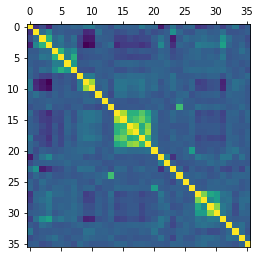

In [45]:
plt.matshow(data.corr())
plt.show()

In [46]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-2bd73260404e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway
ethnicity,1.00,-0.21,-0.09,-0.28,-0.02,0.00,0.00,0.04,0.03,0.14,0.15,0.02,0.01,-0.06,0.07,0.01,0.01,0.01,0.15,0.05,0.05,-0.33,-0.09,0.11,-0.06,0.03,0.04,-0.20,-0.16,-0.08,-0.01,-0.14,-0.02,0.13,-0.09,-0.01
delivery_age,-0.21,1.00,0.08,0.23,-0.02,0.00,-0.03,-0.04,-0.05,-0.26,-0.24,0.09,-0.02,-0.02,-0.08,-0.06,-0.01,-0.02,-0.11,-0.01,-0.09,-0.05,0.00,0.29,0.05,-0.05,-0.06,0.04,0.05,-0.01,0.01,0.09,-0.06,-0.05,-0.03,0.00
highest_edu12,-0.09,0.08,1.00,0.49,0.06,0.13,-0.02,0.09,-0.14,-0.33,-0.32,0.01,-0.01,-0.02,-0.16,-0.16,-0.10,-0.14,-0.11,-0.10,0.01,0.11,0.00,-0.31,-0.02,0.08,0.03,0.05,0.09,0.04,0.02,0.29,0.09,-0.02,-0.00,-0.08
household_income,-0.28,0.23,0.49,1.00,0.07,0.11,0.02,0.05,-0.15,-0.43,-0.38,-0.05,0.02,0.08,-0.25,-0.18,-0.17,-0.17,-0.21,-0.16,-0.03,0.24,0.01,-0.23,0.04,0.01,-0.02,0.17,0.14,0.13,0.10,0.38,0.04,-0.02,0.04,-0.05
pc_vig,-0.02,-0.02,0.06,0.07,1.00,0.48,0.18,0.27,-0.06,-0.03,-0.02,0.02,0.00,-0.04,-0.08,-0.09,-0.03,-0.05,-0.02,-0.03,-0.04,0.03,0.01,-0.10,-0.04,-0.00,0.04,0.06,0.01,0.01,-0.03,0.07,-0.04,-0.01,0.09,0.01
pc_mvpa,0.00,0.00,0.13,0.11,0.48,1.00,0.18,0.47,-0.09,-0.06,-0.04,-0.03,-0.01,-0.02,-0.10,-0.11,-0.12,-0.12,-0.11,-0.11,-0.02,0.06,0.02,-0.08,-0.04,0.02,0.04,0.06,0.01,0.04,0.02,0.13,-0.04,-0.02,0.00,0.02
pg_vig,0.00,-0.03,-0.02,0.02,0.18,0.18,1.00,0.34,-0.02,-0.02,0.01,0.02,-0.02,-0.06,0.02,0.04,0.04,0.03,0.00,0.03,0.02,0.02,0.06,0.01,-0.01,0.03,0.01,0.02,0.02,0.02,0.06,0.06,-0.03,0.00,-0.04,-0.01
pg_mvpa,0.04,-0.04,0.09,0.05,0.27,0.47,0.34,1.00,-0.06,-0.07,-0.08,0.01,-0.01,-0.00,-0.07,-0.07,-0.01,-0.03,-0.06,-0.02,0.04,0.03,0.01,-0.03,-0.04,0.05,0.07,0.07,0.05,0.08,0.07,0.09,0.02,-0.02,0.00,-0.07
smoking_pg,0.03,-0.05,-0.14,-0.15,-0.06,-0.09,-0.02,-0.06,1.00,0.16,0.16,0.00,-0.03,0.01,0.07,0.06,0.08,0.08,0.08,0.05,0.07,0.03,0.02,0.10,-0.02,-0.02,-0.01,0.01,-0.01,0.03,0.03,-0.06,0.04,-0.02,0.01,0.06
passive_smoke_pc,0.14,-0.26,-0.33,-0.43,-0.03,-0.06,-0.02,-0.07,0.16,1.00,0.80,0.03,0.05,-0.06,0.13,0.13,0.10,0.11,0.14,0.04,0.07,-0.05,0.03,0.08,0.01,-0.02,0.04,-0.16,-0.13,-0.07,-0.05,-0.28,0.00,0.10,0.07,0.00


## Variance Inflation Factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  
import pandas as pd 
from pandas.api.types import CategoricalDtype 

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
data = pd.read_csv('./data/final_cohort.csv')
data = data.iloc[:, 4:]
data.drop(columns="allergy_cum", inplace=True)
data.head()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway,eczema_label,rhinitis_label,wheeze_label
0,1.0,35.94,1.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,26.0,35.0,26.0,29.0,3.0,0.0,0.0,0.0,0.0,1.0,3.180,0.0,0.0,10.0,11.5,10.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,32.54,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,36.29,45.0,52.0,52.0,50.0,9.0,14.0,0.0,0.0,0.0,0.0,2.598,1.0,0.0,4.0,6.0,10.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.0,35.91,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.71,37.0,37.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,2.970,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN
3,1.0,30.25,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.29,51.0,51.0,30.0,32.0,10.0,4.0,1.0,1.0,0.0,0.0,3.850,1.0,0.0,6.0,10.0,10.0,12.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN
4,2.0,40.00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,39.14,26.0,34.0,NaN,NaN,8.0,NaN,0.0,0.0,0.0,3.0,3.775,1.0,0.0,3.5,5.5,4.5,7.5,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


In [55]:
pd.set_option('display.max_columns', None)
data.loc[data['bf_m6'] == 99, 'bf_m6'] = np.nan
data.loc[data['bisq_q3_m12'] == -8888, 'bisq_q3_m12'] = np.nan
data.loc[data['bisq_totslphrs_m12'] == -8888, 'bisq_totslphrs_m12'] = np.nan
data.drop(columns=["eczema_label", 'rhinitis_label', 'wheeze_label'], inplace=True)
data = data.fillna(data.median())
data.describe()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ethnicity,delivery_age,highest_edu12,household_income,pc_vig,pc_mvpa,pg_vig,pg_mvpa,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.00000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,1.529105,31.591086,0.778454,3.928758,0.449175,1.022589,0.032146,0.370113,0.017376,0.358818,0.316247,1.299739,0.511729,38.796299,34.177237,36.516942,34.051260,36.43788,7.253692,6.357081,0.165074,0.421373,0.026933,0.773241,3.109119,0.332754,0.073849,8.694345,11.965740,9.046192,11.935259,0.539531,0.423979,0.030408,0.052997,0.111208
std,0.752257,4.736035,0.415468,1.033423,0.719164,0.963424,0.220297,0.745031,0.130725,0.479862,0.465213,0.458343,0.500080,1.474995,9.426136,8.553739,8.853394,8.28090,4.334084,4.100927,0.371409,0.493994,0.161958,0.907848,0.449450,0.471404,0.261638,1.570952,2.194315,1.082938,1.367602,0.498652,0.494402,0.171783,0.224126,0.314526
min,1.000000,18.930000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.860000,20.000000,20.000000,20.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.305000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.140000,27.000000,31.000000,29.000000,32.00000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.856500,0.000000,0.000000,8.000000,11.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,31.520000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,39.000000,33.000000,36.000000,33.000000,36.00000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.120000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,34.880000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,39.710000,40.000000,42.000000,38.000000,40.00000,10.000000,8.000000,0.000000,1.000000,0.000000,1.000000,3.390000,1.000000,0.000000,9.000000,13.000000,9.500000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,46.890000,1.000000,5.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,41.430000,73.000000,68.000000,74.000000,73.00000,26.000000,28.000000,1.000000,1.000000,1.000000,7.000000,4.575000,1.000000,1.000000,13.000000,20.000000,13.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
data['ethnicity'] = pd.Categorical(data.ethnicity)
inc_type = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)
vig_type = CategoricalDtype(categories=[0, 1, 2], ordered=True)
mvpa_type = CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0], ordered=True)
# df['highest_edu'] = df['highest_edu'].astype(edu_type)
data['household_income'] = data['household_income'].astype(inc_type)
data[['pc_vig', 'pg_vig']] = data[['pc_vig', 'pg_vig']].astype(vig_type)
data[['pc_mvpa', 'pg_mvpa']] = data[['pc_mvpa', 'pg_mvpa']].astype(mvpa_type)
data.describe()

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,delivery_age,highest_edu12,smoking_pg,passive_smoke_pc,passive_smoke_pg,delivery_mode,sex,ga,stai_state_pw26,stai_trait_pw26,stai_state_m3,stai_trait_m3,epds_tot_pw26,epds_tot_m3,infection_m3,alcohol_pc,alcohol_pg,parity,weight_birth,antibiotics_labour,antibiotics_m3,bisq_q3_m6,bisq_totslphrs_m6,bisq_q3_m12,bisq_totslphrs_m12,bf_m6,maternal_allergy_pw11,cat,dog,expressway
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.00000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,31.591086,0.778454,0.017376,0.358818,0.316247,1.299739,0.511729,38.796299,34.177237,36.516942,34.051260,36.43788,7.253692,6.357081,0.165074,0.421373,0.026933,0.773241,3.109119,0.332754,0.073849,8.694345,11.965740,9.046192,11.935259,0.539531,0.423979,0.030408,0.052997,0.111208
std,4.736035,0.415468,0.130725,0.479862,0.465213,0.458343,0.500080,1.474995,9.426136,8.553739,8.853394,8.28090,4.334084,4.100927,0.371409,0.493994,0.161958,0.907848,0.449450,0.471404,0.261638,1.570952,2.194315,1.082938,1.367602,0.498652,0.494402,0.171783,0.224126,0.314526
min,18.930000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.860000,20.000000,20.000000,20.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780000,0.000000,0.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.305000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.140000,27.000000,31.000000,29.000000,32.00000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.856500,0.000000,0.000000,8.000000,11.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.520000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,39.000000,33.000000,36.000000,33.000000,36.00000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,3.120000,0.000000,0.000000,9.000000,12.000000,9.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,34.880000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,39.710000,40.000000,42.000000,38.000000,40.00000,10.000000,8.000000,0.000000,1.000000,0.000000,1.000000,3.390000,1.000000,0.000000,9.000000,13.000000,9.500000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,46.890000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,41.430000,73.000000,68.000000,74.000000,73.00000,26.000000,28.000000,1.000000,1.000000,1.000000,7.000000,4.575000,1.000000,1.000000,13.000000,20.000000,13.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
X = add_constant(data)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 

/Users/dongyizhi/opt/anaconda3/envs/exposome_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


const                    1090.241403
ethnicity                   1.328017
delivery_age                1.367883
highest_edu12               1.500284
household_income            1.725097
pc_vig                      1.372675
pc_mvpa                     1.504273
pg_vig                      1.174405
pg_mvpa                     1.325621
smoking_pg                  1.077605
passive_smoke_pc            2.793636
passive_smoke_pg            2.706493
delivery_mode               1.079248
sex                         1.023074
ga                          1.552231
stai_state_pw26             3.196343
stai_trait_pw26             3.963897
stai_state_m3               4.080857
stai_trait_m3               4.846739
epds_tot_pw26               2.153461
epds_tot_m3                 2.788353
infection_m3                1.215629
alcohol_pc                  1.285183
alcohol_pg                  1.067479
parity                      1.429314
weight_birth                1.551790
antibiotics_labour          1.042608
a